In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.graphics.api as smg
from scipy import stats
from matplotlib.patheffects import withStroke
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')
%matplotlib inline

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 1. nan]


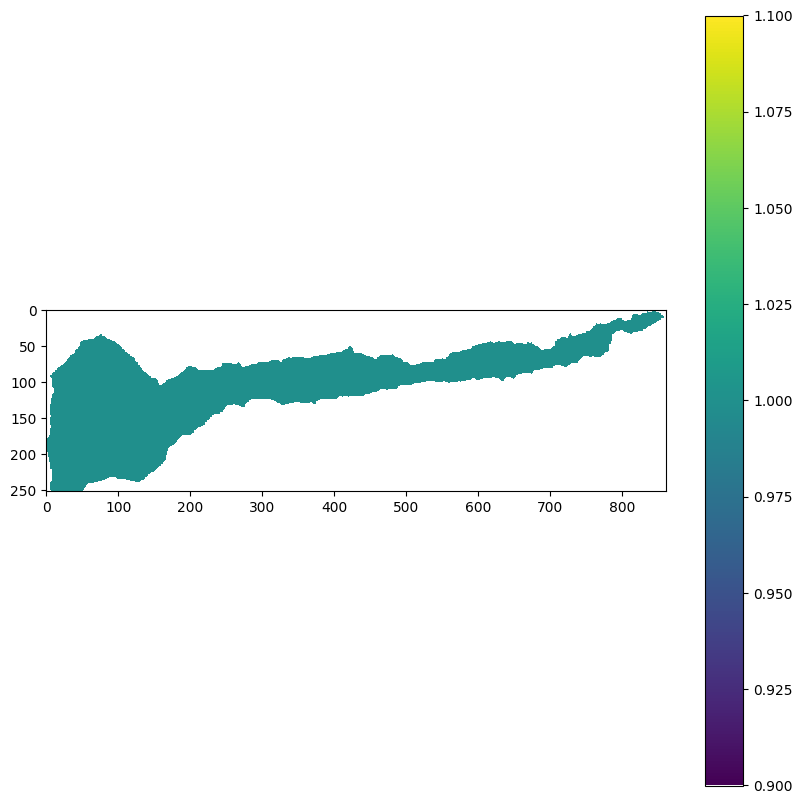

In [3]:
cuencaRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/Cuencacorte2.tif?raw=true')
cuencaB1 = cuencaRaster.read(1)

# Correción para organizar luego los otros valores
cuencaB1 = np.where(cuencaB1 == 255, np.nan, 1)

plt.figure(figsize=(10, 10))  # Ajusta el tamaño
plt.imshow(cuencaB1)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', cuencaB1.shape)
print('Valores únicos: ', np.unique(cuencaB1))

InventarioB1
Forma:  (252, 862)
Valores únicos:  [0 1]


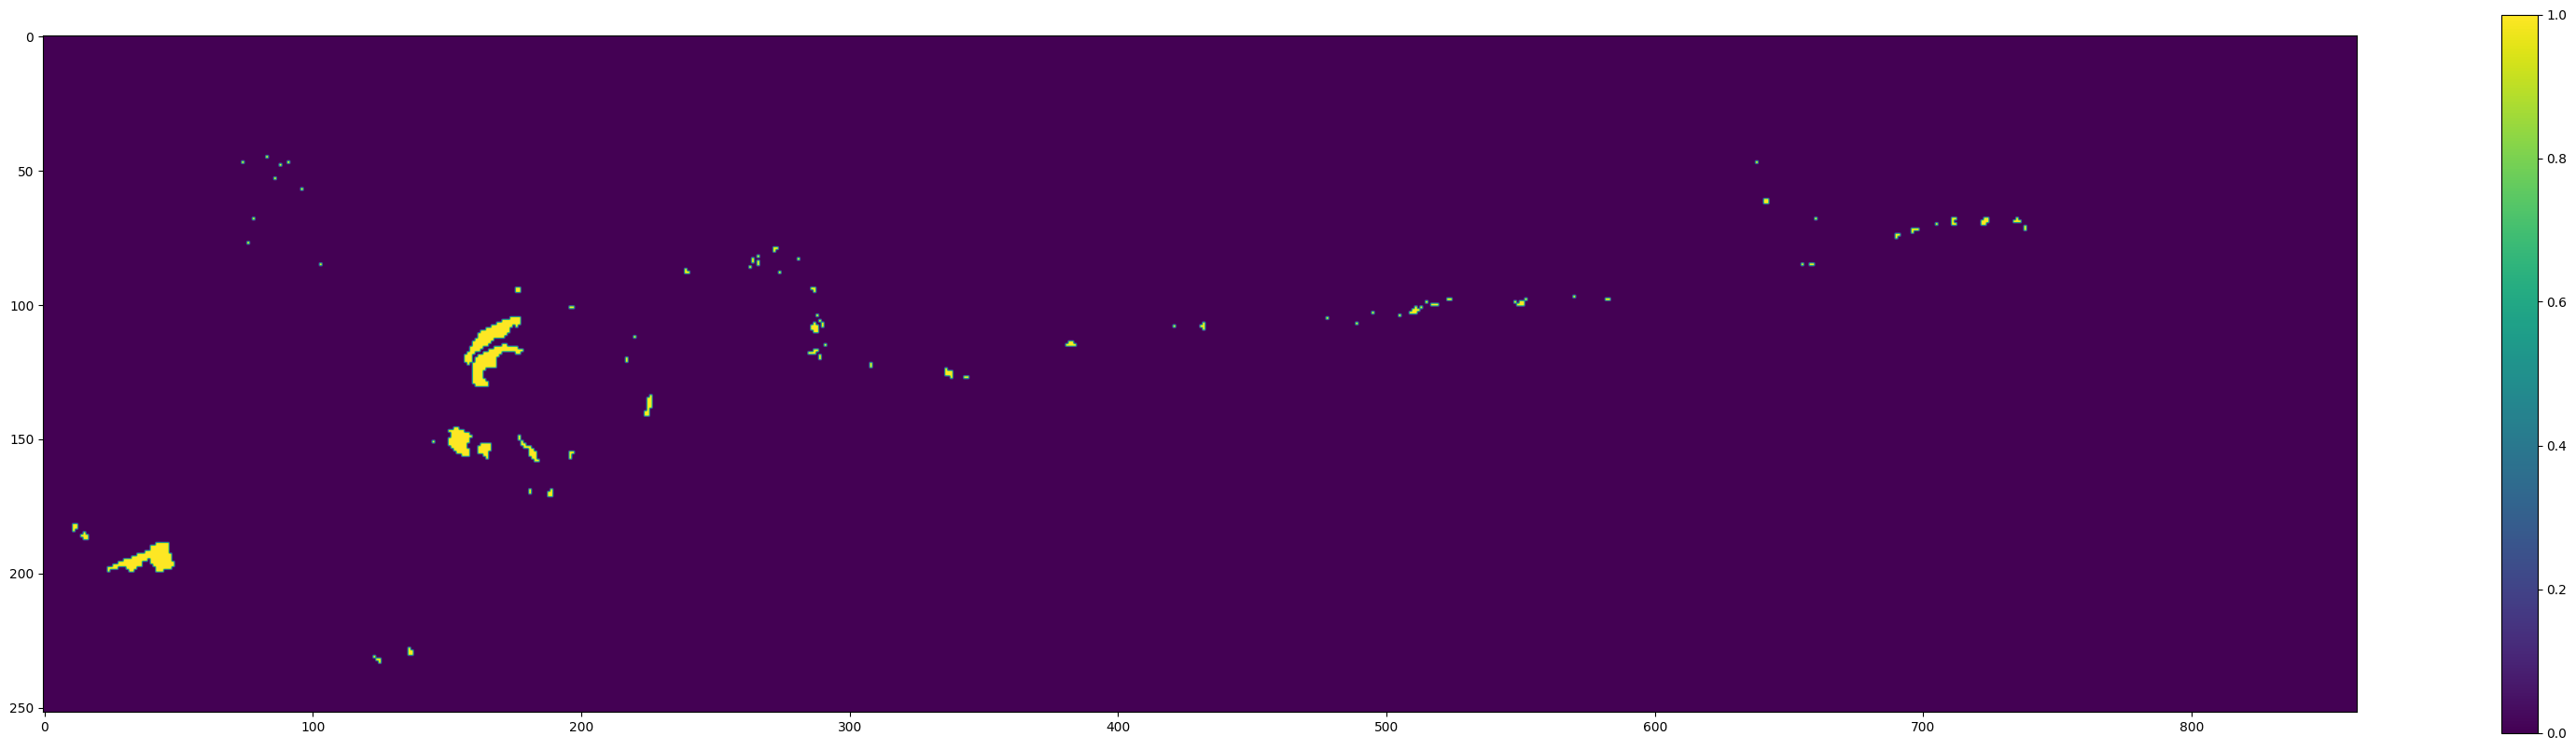

In [4]:
inventarioRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/InvetarioRas2.tif?raw=true')
inventarioB1 = inventarioRaster.read(1)

# Correción para organizar luego los otros valores
inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)
#inventarioB1 = np.where(inventarioB1 == 0, np.nan,  inventarioB1)
#inventarioB1 = np.where(inventarioB1 == 15, np.nan,  inventarioB1)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioB1)
plt.colorbar();

print('InventarioB1')
print('Forma: ', inventarioB1.shape)
print('Valores únicos: ', np.unique(inventarioB1))

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 0.  1. nan]


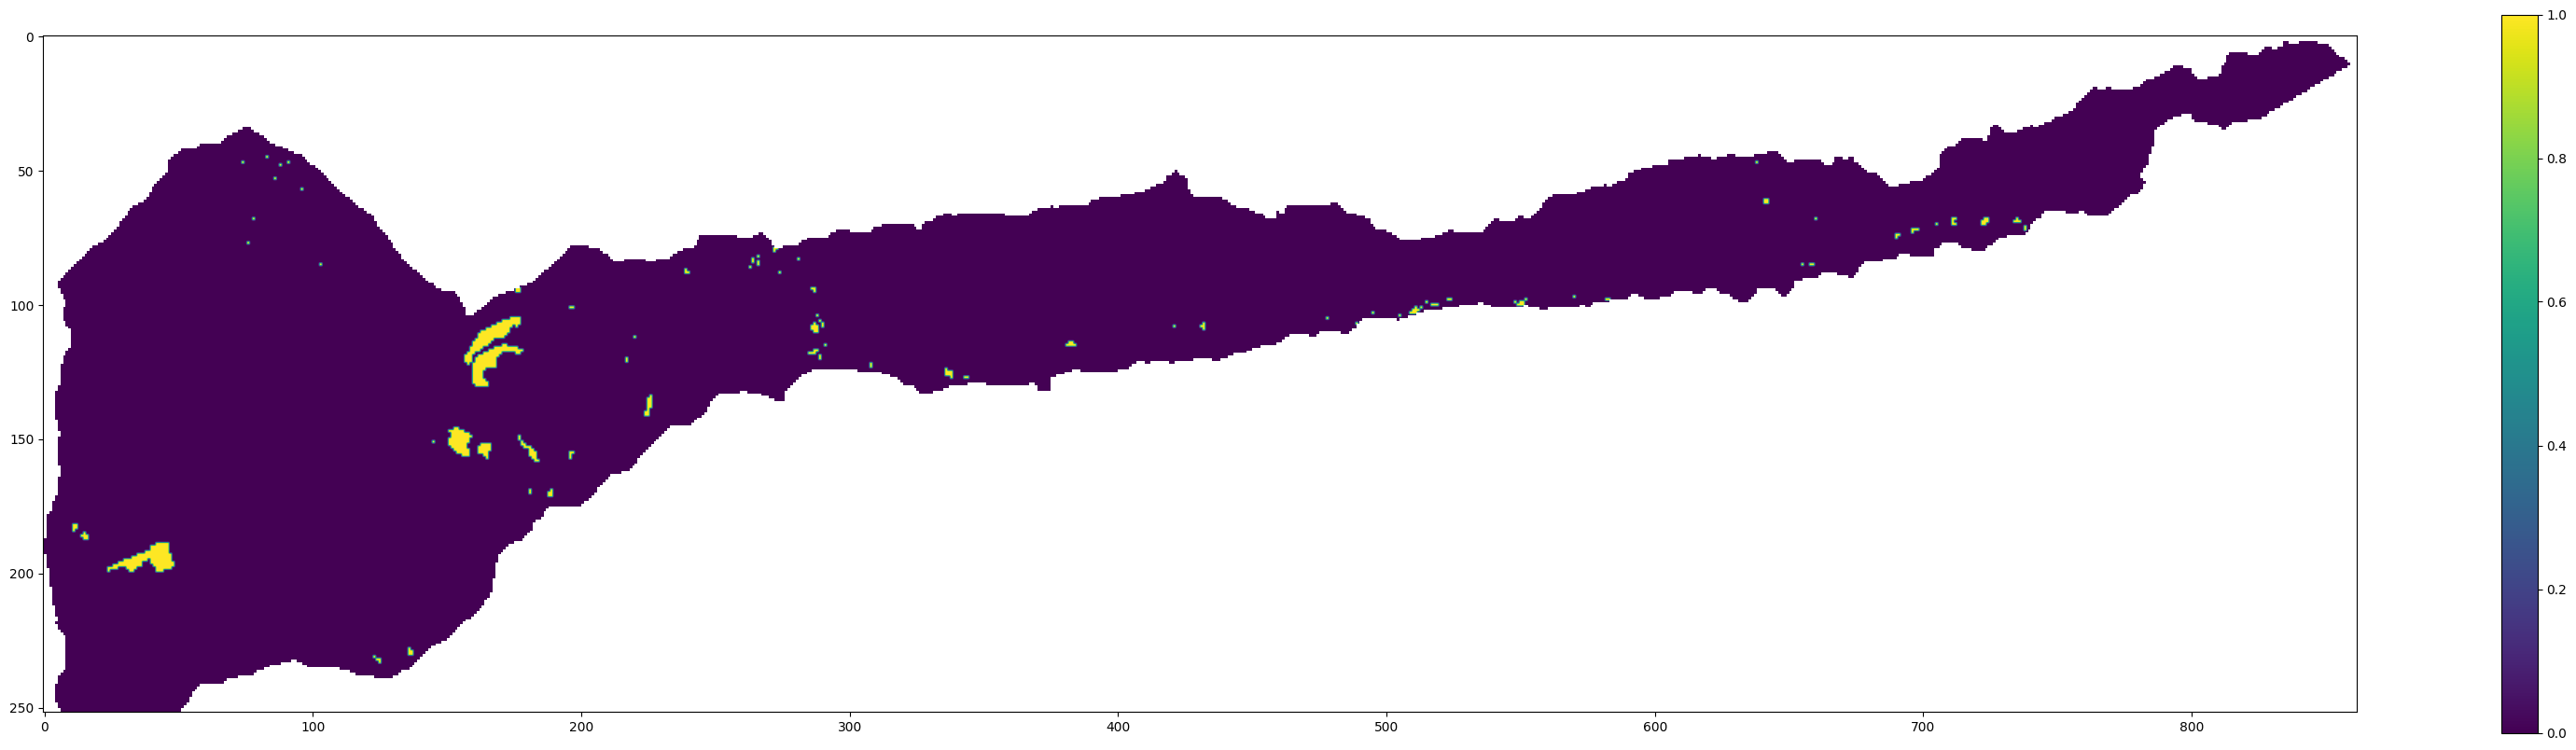

In [5]:
inventarioZona = inventarioB1 * cuencaB1

#inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioZona)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', inventarioZona.shape)
print('Valores únicos: ', np.unique(inventarioZona))

#plt.savefig('InventarioLectura.png', dpi=500, bbox_inches='tight')

Forma:  (252, 862)
Valores únicos:  [-1.000000e+00  0.000000e+00  9.690028e-03 ...  3.599896e+02  3.599927e+02
           nan]


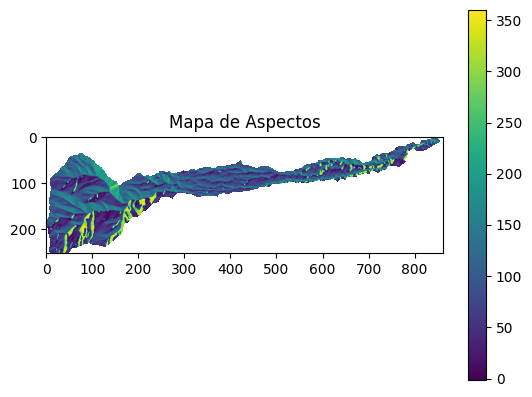

In [6]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AspectoRas2.tif?raw=true')
aspectos=raster.read(1)
aspectos=np.where(aspectos == aspectos.min(), np.nan, aspectos)
plt.imshow(aspectos)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Aspectos')
print('Forma: ', aspectos.shape)
print('Valores únicos: ', np.unique(aspectos))

Forma:  (252, 862)
Valores únicos:  [-59.04177  -51.092407 -49.6877   ...  23.87655   26.930264        nan]


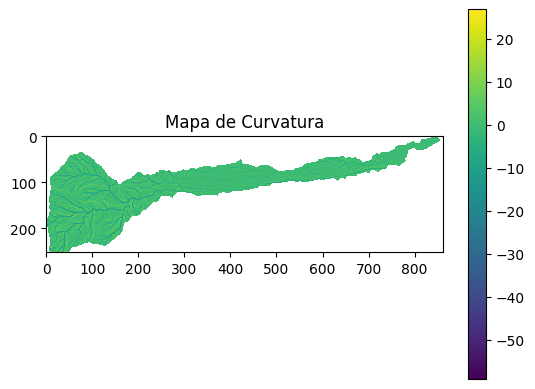

In [7]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/CurvaturaRas2.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura == curvatura.min(), np.nan, curvatura)
plt.imshow(curvatura)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Curvatura')
print('Forma: ', curvatura.shape)
print('Valores únicos: ', np.unique(curvatura))

Forma:  (252, 862)
Valores únicos:  [1582.284  1582.3328 1582.3752 ... 2934.0857 2934.192        nan]


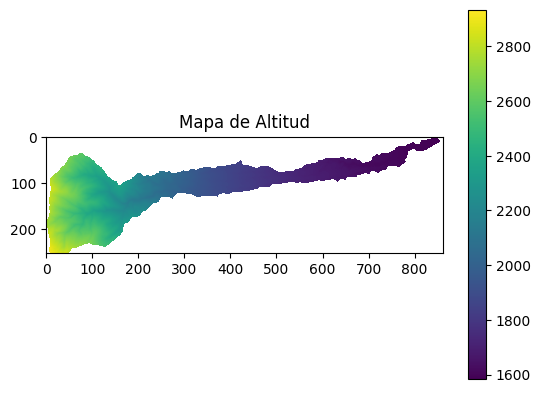

In [8]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AltitudRas2.tif?raw=true')
altitud=raster.read(1)
altitud=np.where(altitud == altitud.min(), np.nan, altitud)
plt.imshow(altitud)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Altitud')
print('Forma: ', altitud.shape)
print('Valores únicos: ', np.unique(altitud))

Forma:  (252, 862)
Valores únicos:  [ 1.  2.  3.  4.  5. nan]


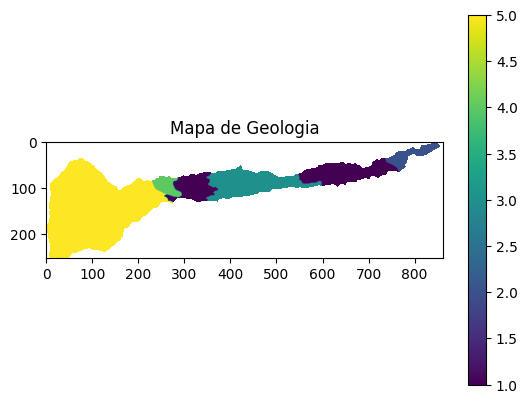

In [9]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/GeoRas2.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia == 255,np.nan,geologia)
geologia=np.where(geologia == geologia.min(), np.nan, geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Geologia')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (252, 862)
Valores únicos:  [ 0.  1.  2.  3.  4. nan]


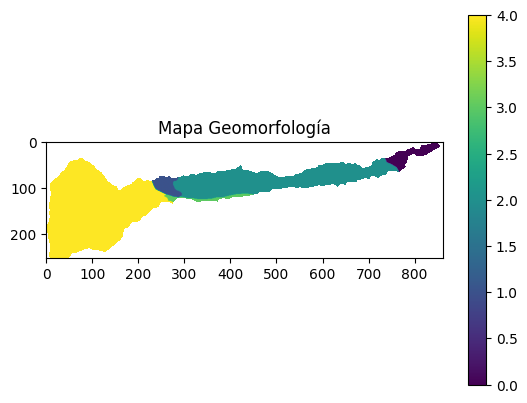

In [10]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/MorfoRas2.tif?raw=true')
geomorfo=raster.read(1)
geomorfo=np.where(geomorfo == 255,np.nan,geomorfo)
plt.imshow(geomorfo)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geomorfología')
print('Forma: ', geomorfo.shape)
print('Valores únicos: ', np.unique(geomorfo))

Forma:  (252, 862)
Valores únicos:  [0.0000000e+00 1.9843397e-03 3.8160379e-03 ... 6.2051132e+01 6.2054195e+01
           nan]


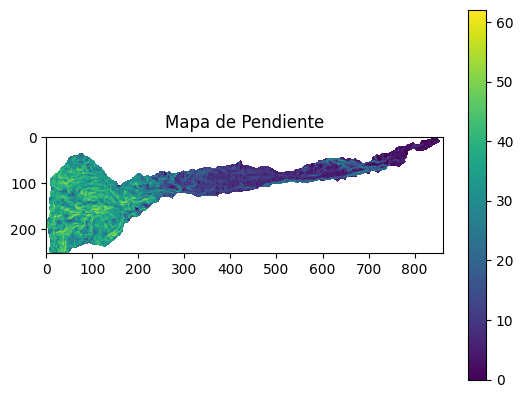

In [11]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/PendienteRas3.tif?raw=true')
slope=raster.read(1)
slope=np.where(slope == slope.min(), np.nan, slope)
plt.imshow(slope)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Pendiente')
print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))

In [12]:
#Convertimos matrices a vectores
inventariovector = inventarioZona.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

aspectosvector = aspectos.ravel()
print('Longitud aspectosvector: ', aspectosvector.shape[0])

curvaturavector = curvatura.ravel()
print('Longitud curvaturavector: ', curvaturavector.shape[0])

altitudvector = altitud.ravel()
print('Longitud altitudvector: ', altitudvector.shape[0])

geologiavector = geologia.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

geomorfovector = geomorfo.ravel()
print('Longitud geomorfovector: ', geomorfovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

#eliminamos los nans del vector
inventariovectorMenM = inventariovector[~np.isnan(inventariovector)]
print('Longitud inventariovectorMenM: ', inventariovectorMenM.shape[0])

aspectosvectorMenM = aspectosvector[~np.isnan(aspectosvector)]
print('Longitud aspectosvectorMenM: ', aspectosvectorMenM.shape[0])

curvaturavectorMenM = curvaturavector[~np.isnan(curvaturavector)]
print('Longitud curvaturavectorMenM: ', curvaturavectorMenM.shape[0])

altitudvectorMenM = altitudvector[~np.isnan(altitudvector)]
print('Longitud altitudvectorMenM: ', altitudvectorMenM.shape[0])

geologiavectorMenM = geologiavector[~np.isnan(geologiavector)]
print('Longitud geologiavectorMenM: ', geologiavectorMenM.shape[0])

geomorfovectorMenM = geomorfovector[~np.isnan(geomorfovector)]
print('Longitud geomorfovectorMenM: ', geomorfovectorMenM.shape[0])

slopevectorMenM = slopevector[~np.isnan(slopevector)]
print('Longitud slopevectorMenM: ', slopevectorMenM.shape[0])

#Realizamos el Dataframe

diccionario={'inventario':inventariovectorMenM, 'aspectos':aspectosvectorMenM, 'curvatura':curvaturavectorMenM,
               'altitud':altitudvectorMenM,'geologia':geologiavectorMenM,
               'geomorfologia':geomorfovectorMenM, 'pendiente':slopevectorMenM}

tablaDatos=pd.DataFrame(diccionario)
print(list(tablaDatos.columns))

tablaDatos.tail(5)

Longitud inventariovector:  217224
Longitud aspectosvector:  217224
Longitud curvaturavector:  217224
Longitud altitudvector:  217224
Longitud geologiavector:  217224
Longitud geomorfovector:  217224
Longitud slopevector:  217224
Longitud inventariovectorMenM:  63282
Longitud aspectosvectorMenM:  63282
Longitud curvaturavectorMenM:  63282
Longitud altitudvectorMenM:  63282
Longitud geologiavectorMenM:  63282
Longitud geomorfovectorMenM:  63282
Longitud slopevectorMenM:  63282
['inventario', 'aspectos', 'curvatura', 'altitud', 'geologia', 'geomorfologia', 'pendiente']


,inventario,aspectos,curvatura,altitud,geologia,geomorfologia,pendiente
63277,0.0,67.359482,-2.209582,2822.357666,5.0,4.0,33.464508
63278,0.0,31.936472,13.475179,2820.012939,5.0,4.0,28.379774
63279,0.0,33.755505,11.376484,2816.632080,5.0,4.0,27.254066
63280,0.0,37.180698,6.638794,2812.989258,5.0,4.0,21.701637
63281,0.0,28.403448,1.510018,2810.272217,5.0,4.0,15.197203


In [13]:
# Análisis jerarquico de procesos (AHP)

In [14]:
A = ([[  1, 1, 1/7, 1/7, 1/7, 1/7],
      [  1, 1, 1/7, 1/5, 1/7, 1/5],
      [  7, 7, 1, 1/2, 1, 1/2],
      [  7, 5, 2, 1, 1/5, 1],
      [  7, 7, 1, 2, 1, 3],
      [  7, 5, 2, 1, 1/3, 1]])

B = np.array(A) # para transformarla en una matriz

valores, vectores = np.linalg.eig(B) # Función para calcular los valores y vectores propios

vector_norm = vectores/np.linalg.norm(vectores, ord=1) # normalización de los vectores

print('Estos son los valores propios:\n',valores)
print('\nEstos son los vectores propios:\n', vectores)
print('\nEsto son los vectores propios normalizados:\n',vector_norm)

Estos son los valores propios:
 [ 6.24545839e+00+0.j         -1.23130256e-01+1.46137606j
 -1.23130256e-01-1.46137606j  1.33003928e-01+0.j
 -6.42039728e-16+0.j         -1.32201807e-01+0.j        ]

Estos son los vectores propios:
 [[-6.70905695e-02+0.j          2.11205513e-03+0.03335489j
   2.11205513e-03-0.03335489j  3.53365330e-02+0.j
   4.98463898e-01+0.j         -4.80765802e-02+0.j        ]
 [-7.49636708e-02+0.j         -2.68926533e-02+0.02460339j
  -2.68926533e-02-0.02460339j  1.04950299e-01+0.j
  -3.87694143e-01+0.j         -1.17867587e-01+0.j        ]
 [-4.00744351e-01+0.j          2.68575585e-01+0.31005985j
   2.68575585e-01-0.31005985j -3.61764723e-01+0.j
  -7.75388286e-01+0.j          2.74135246e-01+0.j        ]
 [-4.23015853e-01+0.j          1.40390217e-01-0.39427142j
   1.40390217e-01+0.39427142j  4.56630707e-01+0.j
  -7.47264775e-15+0.j          4.69279689e-01+0.j        ]
 [-6.77460777e-01+0.j         -7.24450372e-01+0.j
  -7.24450372e-01-0.j         -7.49374644e-01+0.j
  

In [18]:
CI = (valores[0] - len(valores)) / (len(valores) - 1)

CR = CI / 1.24

if CR < 0.1:    print('La designación de datos fue aceptable:\n', CR)
else:
    print('La designación de datos NO fue aceptable:\n', CR)

La designación de datos fue aceptable:
 (0.03959006298499962+0j)


In [19]:
#Método combinado
# Para proseguir se utiliza el mayor vector propio, el que corresponde al de la posición 0
# El cual indicará los valores de los pesos de las variables introducidas

matrizIndices = ['aspecto', 'curvatura', 'altitud', 'geologia', 'geomorfologia', 'pendiente']
pesoVariables = vector_norm[:,0]
#print(pesoVariables)

for i in range(len(matrizIndices)):
    print(f'{matrizIndices[i]}:', pesoVariables[i])

aspecto: (-0.03224339202371149+0j)
curvatura: (-0.036027165104666546+0j)
altitud: (-0.19259572970762306+0j)
geologia: (-0.2032993024778514+0j)
geomorfologia: (-0.3255842597800486+0j)
pendiente: (-0.21025015090609883+0j)


In [20]:
#Revisando variables categoricas
nombresColumnas = ['aspecto', 'curvatura', 'altitud', 'geologia', 'geomorfologia', 'pendiente']

Geologia Reclasificado
Forma:  (252, 862)
Valores únicos:  [0.  0.3 0.4 0.7 1.  nan]


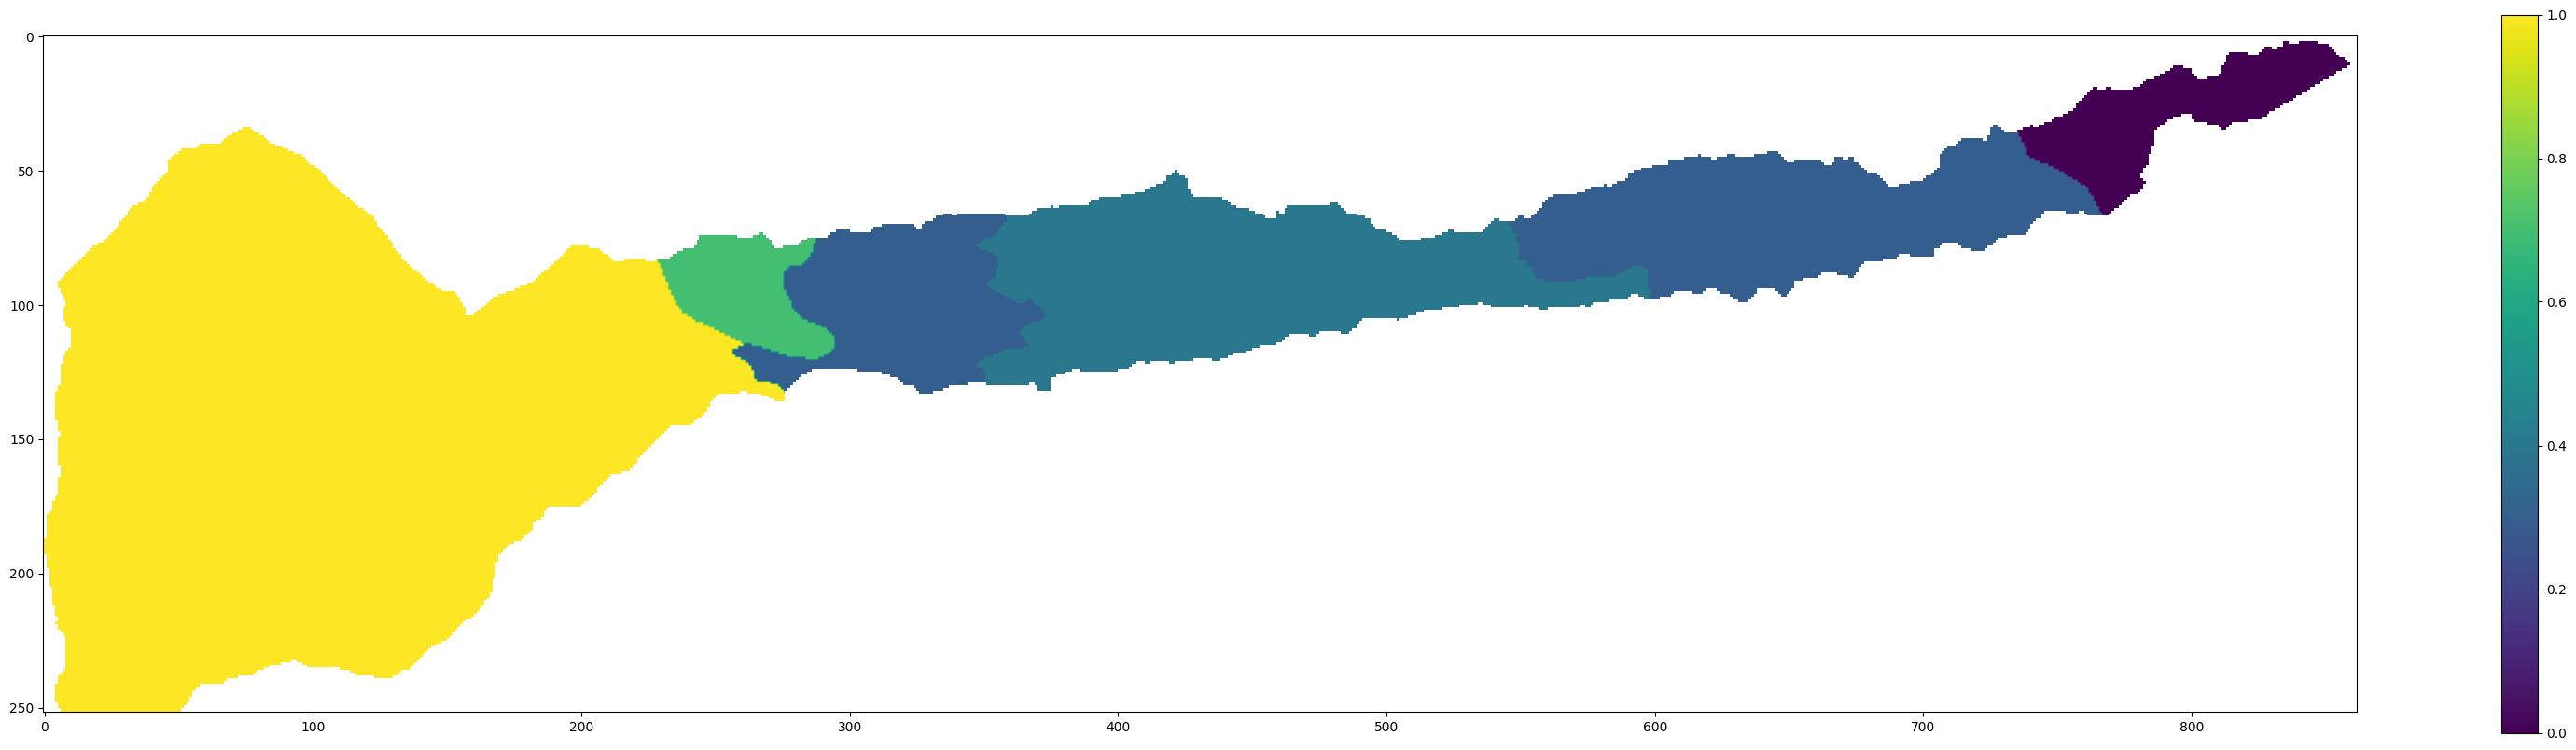

In [22]:
#Asignando peso a las variables categoricas
# Geologia Conocida
# 1: Flujo lodos y escombros I
# 2: Deposito aluviotorrencial
# 3: Flujo lodos y escombros II
# 4: Miembro volcanosedimentario Quebradagrande
# 5: Miembro volcanico Quebradagrande

geologiaReclass = np.where(geologia == 1, 0.3, geologia)
geologiaReclass = np.where(geologia == 2, 0, geologiaReclass)
geologiaReclass = np.where(geologia == 3, 0.4, geologiaReclass)
geologiaReclass = np.where(geologia == 4, 0.7, geologiaReclass)
geologiaReclass = np.where(geologia == 5, 1, geologiaReclass)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(geologiaReclass)

#plt.savefig('MHeuristico_GeologiaReclasificado.png', dpi=500, bbox_inches='tight')
plt.colorbar();

print('Geologia Reclasificado')
print('Forma: ', geologiaReclass.shape)
print('Valores únicos: ', np.unique(geologiaReclass))

Geomorfología Reclasificada
Forma:  (252, 862)
Valores únicos:  [0.  0.3 0.4 0.6 nan]


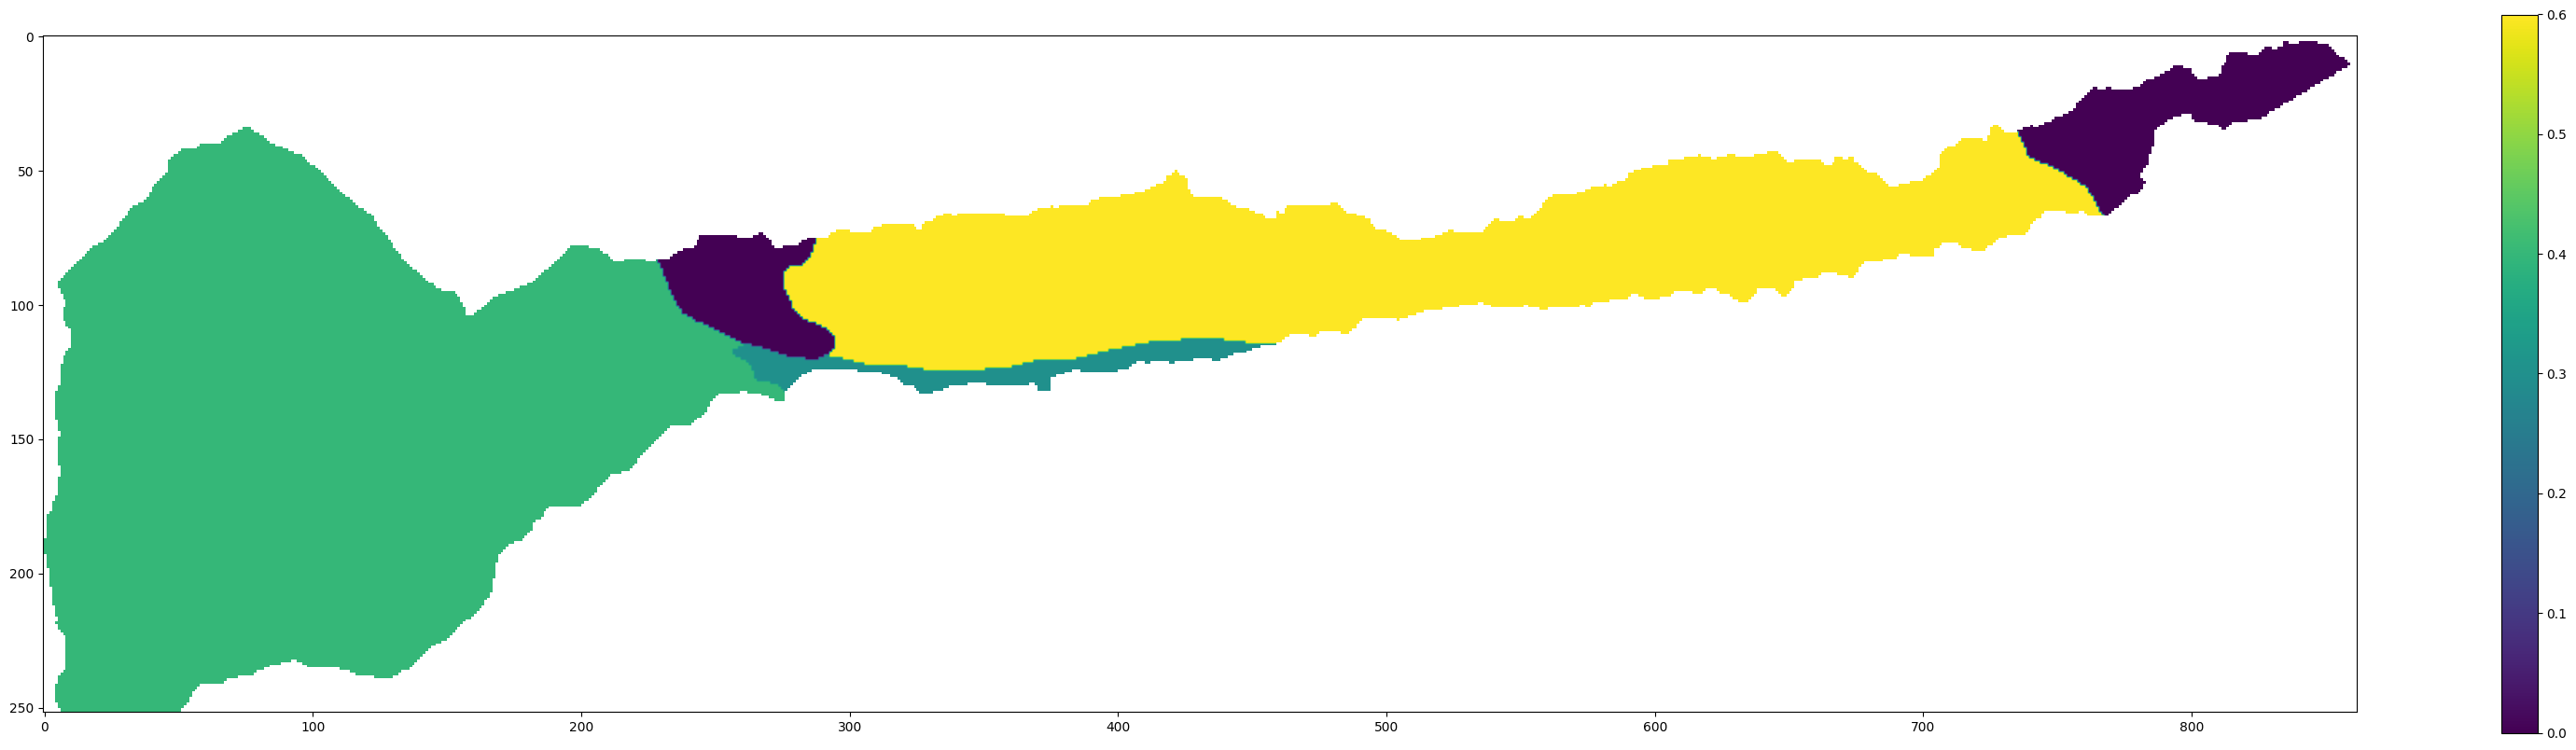

In [23]:
# Geomorfología Conocida
# 1: Terraza aluvial
# 2: Colina suelo residual
# 3: superficie suave en deposito de moderada incision 
# 4: superficie suave en deposito de poca incision 
# 5: Lomos
geomorfologiaReclass = np.where(geomorfo == 1, 0, geomorfo)
geomorfologiaReclass = np.where(geomorfologiaReclass == 2, 0.6, geomorfologiaReclass)
geomorfologiaReclass = np.where(geomorfologiaReclass == 3, 0.3, geomorfologiaReclass)
geomorfologiaReclass = np.where(geomorfologiaReclass == 4, 0.4, geomorfologiaReclass)
geomorfologiaReclass = np.where(geomorfologiaReclass == 5, 1, geomorfologiaReclass)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(geomorfologiaReclass)
plt.savefig('MHeuristico_GeomorfologiaReclasificado.png', dpi=500, bbox_inches='tight')
plt.colorbar();

print('Geomorfología Reclasificada')
print('Forma: ', geomorfologiaReclass.shape)
print('Valores únicos: ', np.unique(geomorfologiaReclass))

Pendientes Reclasificadas
Forma:  (252, 862)
Valores únicos:  [0.  0.2 0.4 0.7 1.  nan]


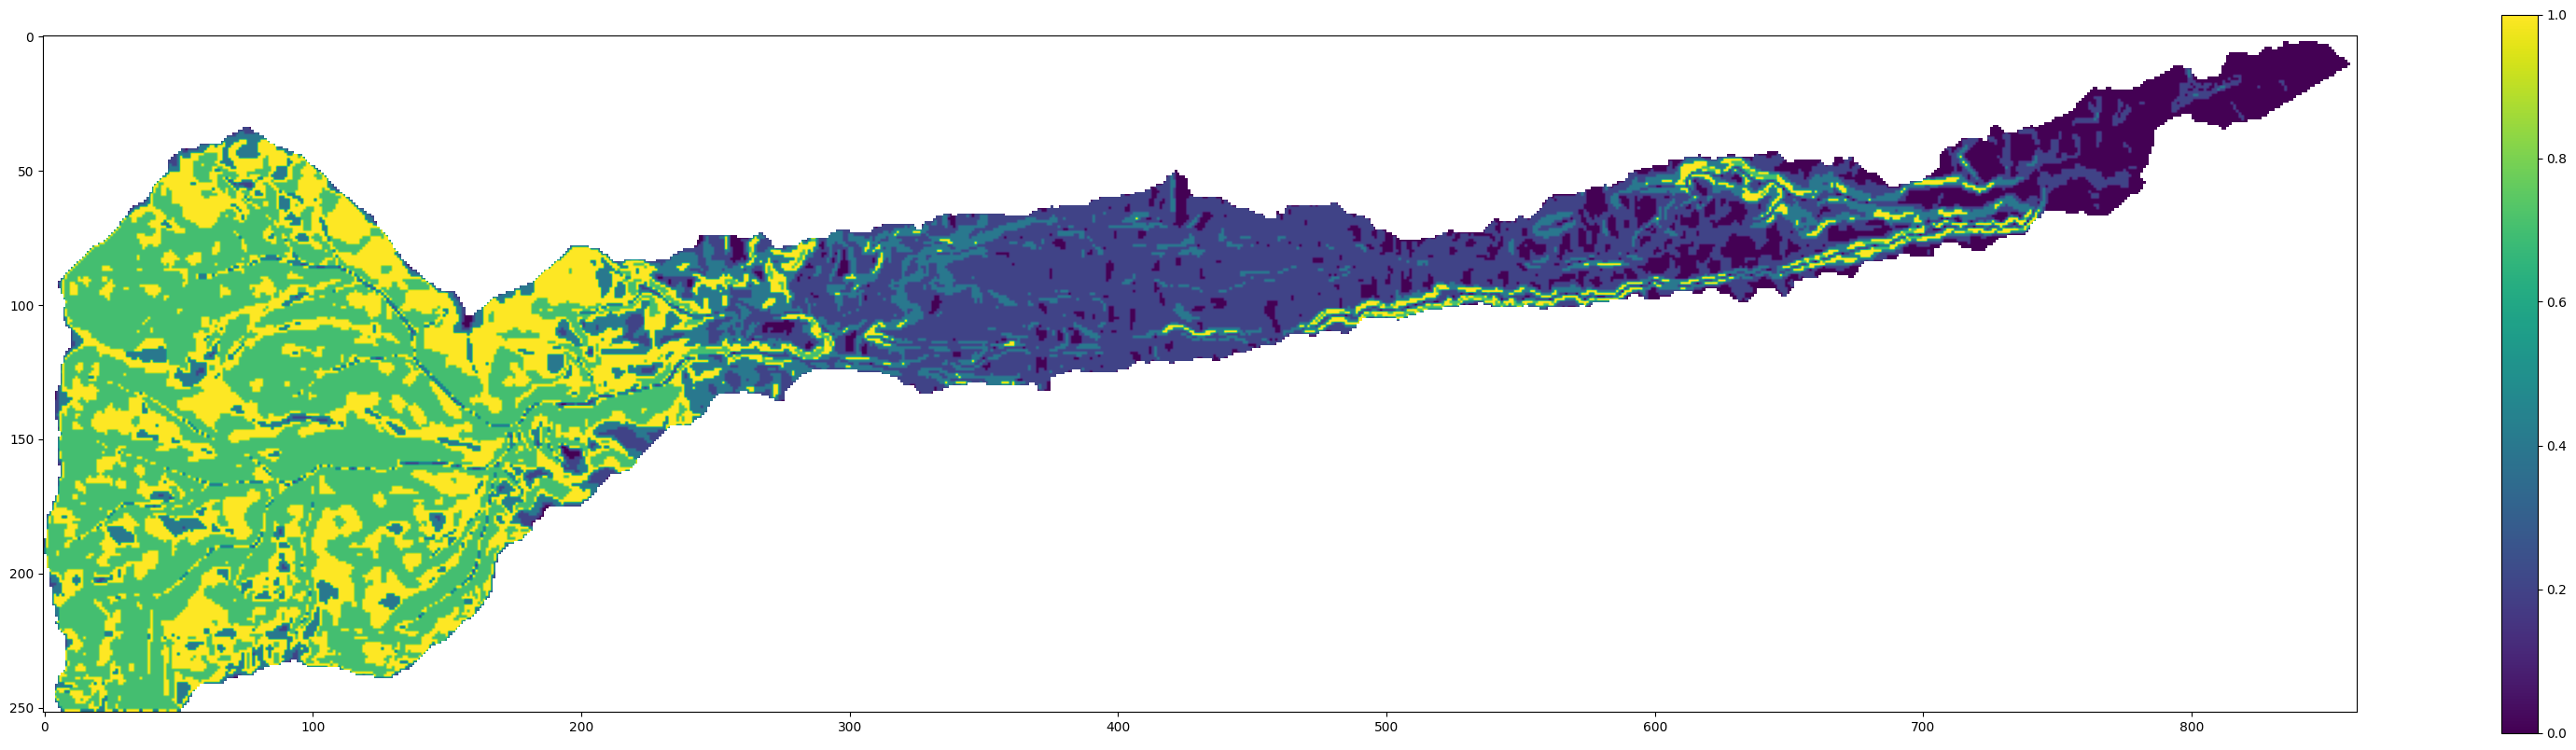

In [24]:
#Convirtiendo variables continuas y asignando pesos
pendienteReclass = np.where ( (np.logical_and (slope >= 0, slope < 5 )), 0, slope );
pendienteReclass = np.where ( (np.logical_and (pendienteReclass >= 5, pendienteReclass < 15)), 0.2, pendienteReclass);
pendienteReclass = np.where ( (np.logical_and (pendienteReclass >= 15, pendienteReclass < 25 )), 0.4, pendienteReclass);
pendienteReclass = np.where ( (np.logical_and (pendienteReclass >= 25, pendienteReclass < 35 )), 1, pendienteReclass);
pendienteReclass = np.where ( pendienteReclass >= 35, 0.7, pendienteReclass);

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(pendienteReclass)
plt.savefig('MHeuristico_PendienteReclasificado.png', dpi=500, bbox_inches='tight')
plt.colorbar();

print('Pendientes Reclasificadas')
print('Forma: ', pendienteReclass.shape)
print('Valores únicos: ', np.unique(pendienteReclass))

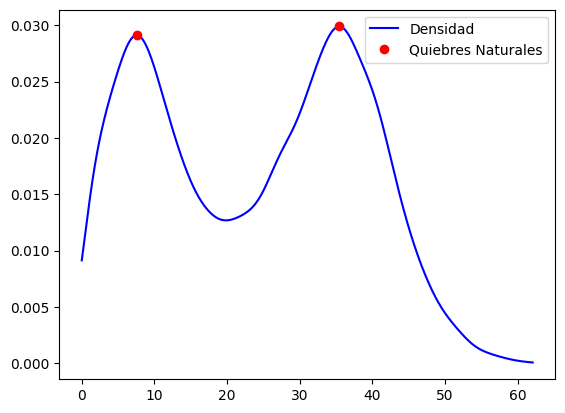

Valores de los quiebres naturales en el eje x:
[ 7.57819003 35.40629768]


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

# Genera datos de muestra
data = tablaDatos['pendiente']

# Estima la densidad utilizando la función gaussian_kde
kde = gaussian_kde(data)

# Evalúa la densidad en un rango de valores
x_values = np.linspace(data.min(), data.max(), 1000)
density = kde(x_values)

# Encuentra los picos en la función de densidad
peaks, _ = find_peaks(density)

# Dibuja la función de densidad
plt.plot(x_values, density, color='blue', label='Densidad')

# Marca los picos en el gráfico de densidad
plt.plot(x_values[peaks], density[peaks], "ro", label="Quiebres Naturales")

# Muestra el gráfico completo
plt.legend()
plt.show()

# Muestra los valores de los quiebres naturales en el eje x
peak_values = x_values[peaks]
print("Valores de los quiebres naturales en el eje x:")
print(peak_values)

Curvatura Reclass
Forma:  (252, 862)
Valores únicos:  [0.2 0.4 1.  nan]


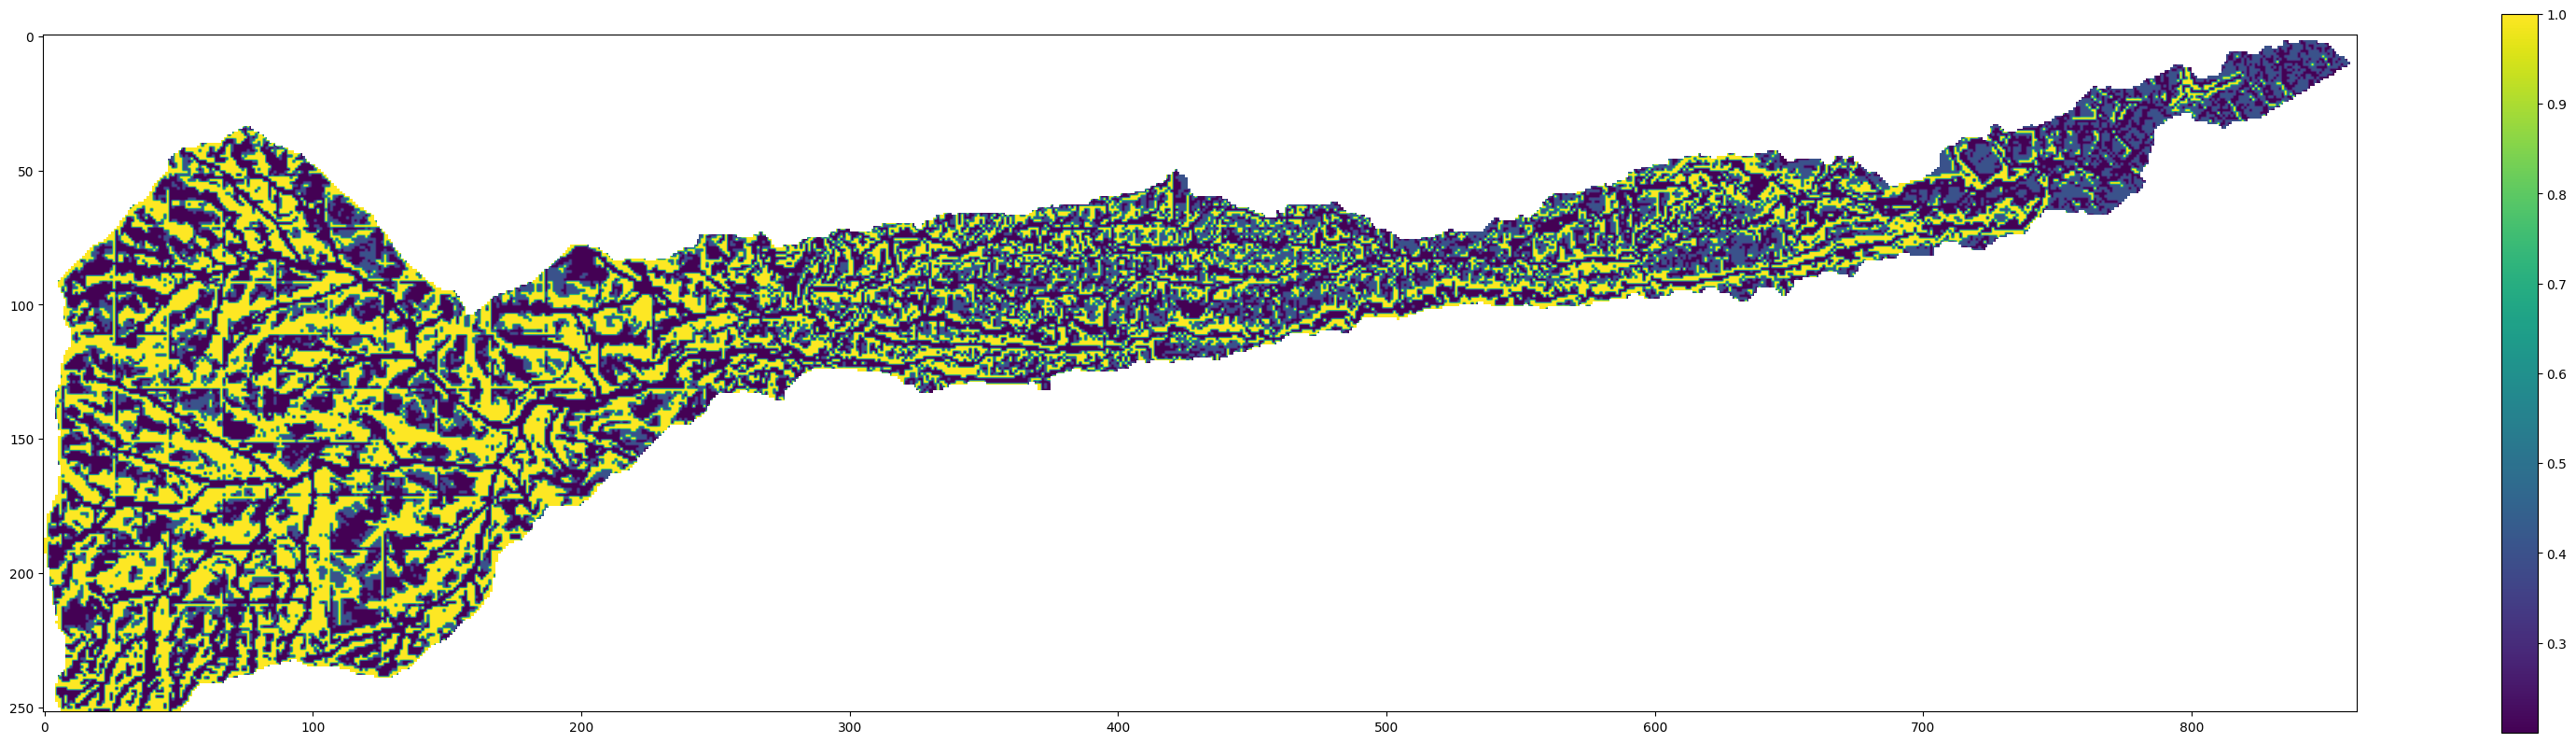

In [27]:
p40 = np.nanpercentile(curvatura, 40)
p60 = np.nanpercentile(curvatura, 60)

curvaturaReclass = np.where ( (np.logical_and (curvatura > p40, curvatura <  p60)), 0.4, curvatura)
curvaturaReclass = np.where(curvaturaReclass >=  p60, 1, curvaturaReclass)
curvaturaReclass = np.where(curvaturaReclass <= p40, 0.2, curvaturaReclass)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(curvaturaReclass)

plt.savefig('MHeuristico_CurvaturaReclasificado.png', dpi=500, bbox_inches='tight')
plt.colorbar();

print('Curvatura Reclass')
print('Forma: ', curvaturaReclass.shape)
print('Valores únicos: ', np.unique(curvaturaReclass))

Aspecto Reclasificadas
Forma:  (252, 862)
Valores únicos:  [0.1 0.4 1.  nan]


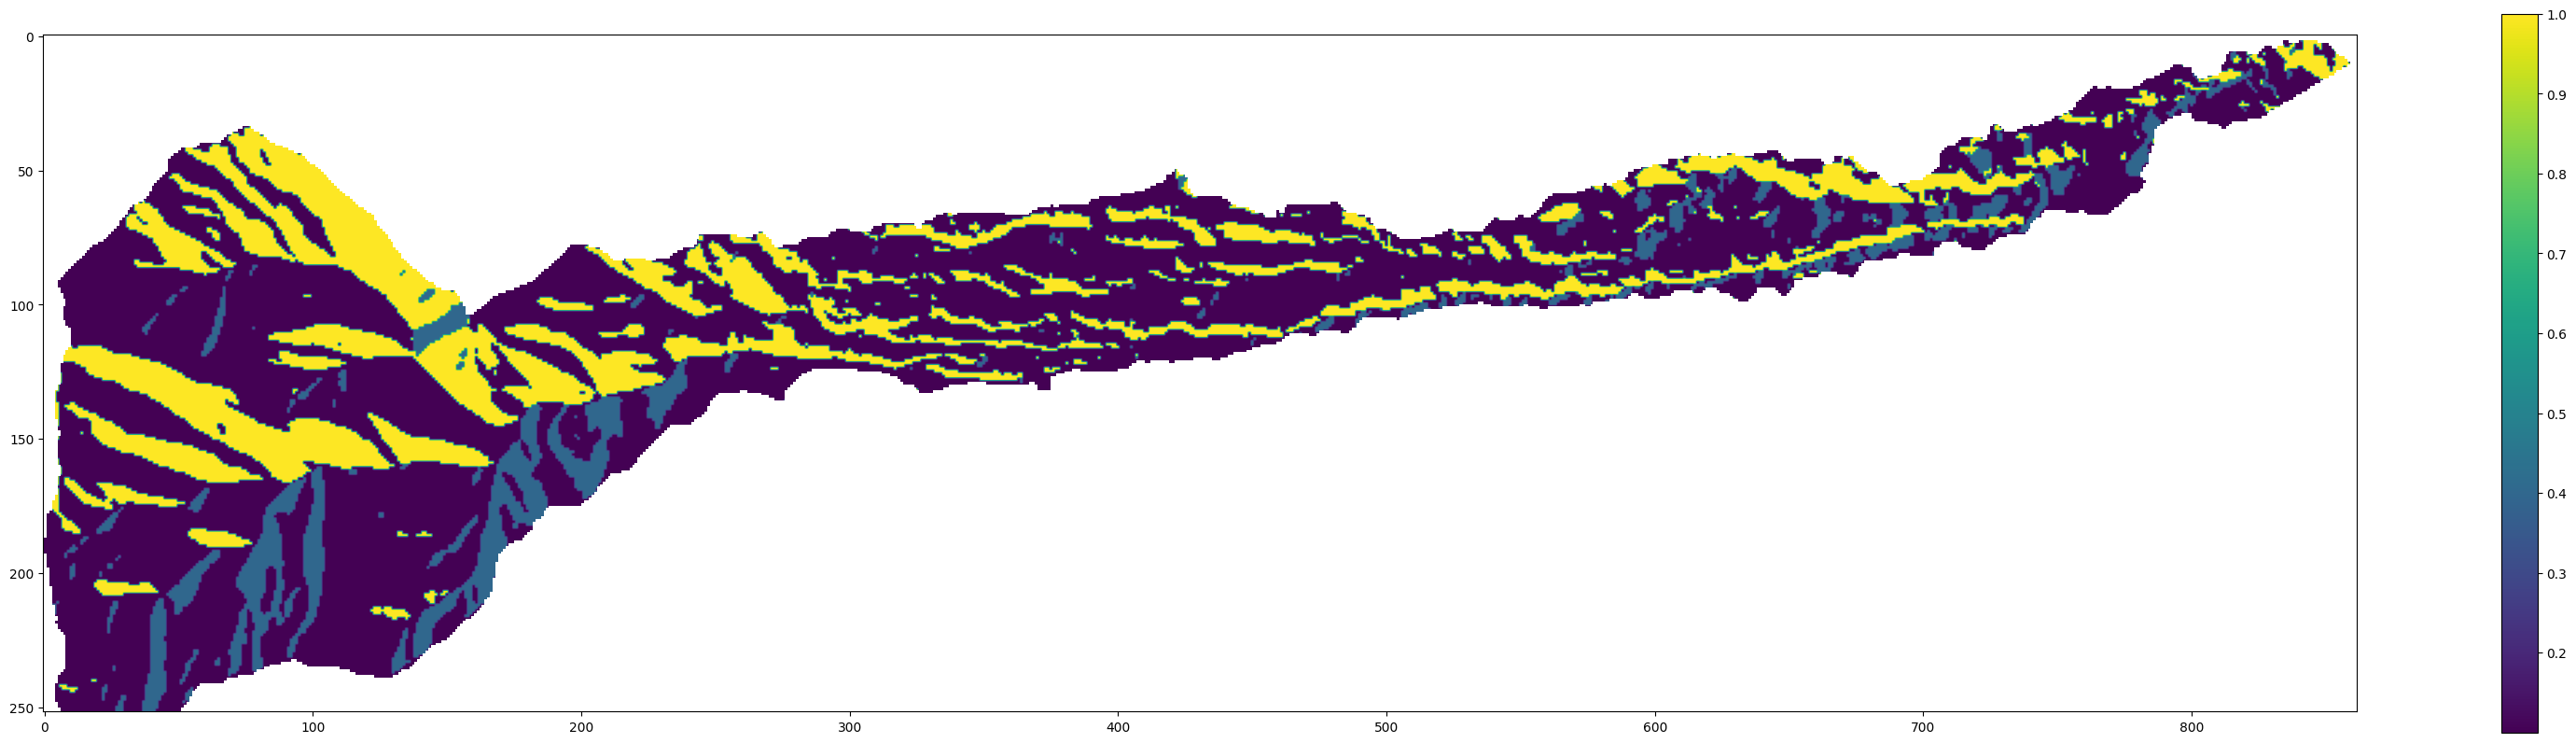

In [28]:
aspectoReclass = np.where ( aspectos < 125, 0.1, aspectos);
aspectoReclass = np.where ( (np.logical_and (aspectoReclass >= 125, aspectoReclass < 230)), 1, aspectoReclass)
aspectoReclass = np.where ( aspectoReclass >= 230, 0.4, aspectoReclass);

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(aspectoReclass)

plt.savefig('MHeuristico_AspectoReclasificado.png', dpi=500, bbox_inches='tight')
plt.colorbar();

print('Aspecto Reclasificadas')
print('Forma: ', aspectoReclass.shape)
print('Valores únicos: ', np.unique(aspectoReclass))

Altitud Reclasificada
Forma:  (252, 862)
Valores únicos:  [0.  0.3 0.5 0.8 0.9 1.  nan]


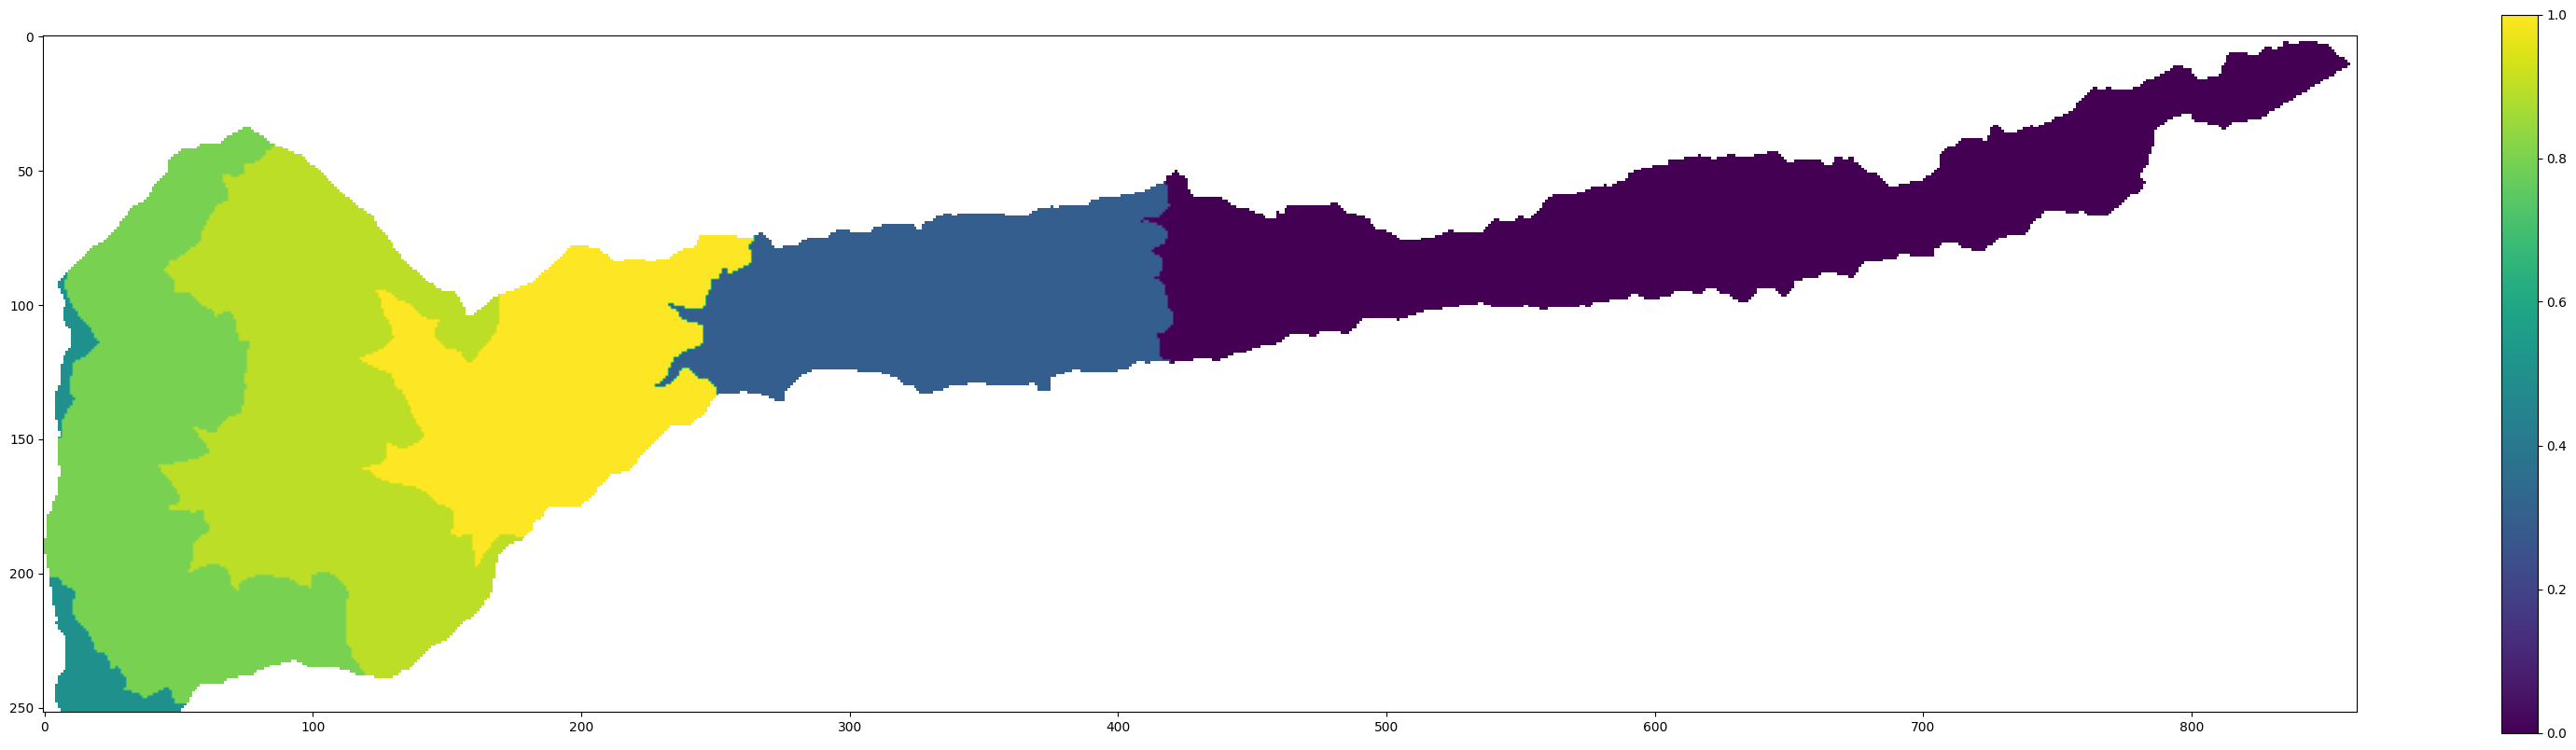

In [30]:
#altitudReclass 
altitudReclass = np.where ( altitud < 1840, 0, altitud)
altitudReclass = np.where ( (np.logical_and (altitudReclass >= 1840, altitudReclass < 2080)), 0.3, altitudReclass)
altitudReclass = np.where ( (np.logical_and (altitudReclass >= 2080, altitudReclass < 2320)), 1, altitudReclass)
altitudReclass = np.where ( (np.logical_and (altitudReclass >= 2320, altitudReclass < 2560)), 0.9, altitudReclass)
altitudReclass = np.where ( (np.logical_and (altitudReclass >= 2560, altitudReclass < 2800)), 0.8, altitudReclass)
altitudReclass = np.where ( altitudReclass >= 2800, 0.5, altitudReclass)



#altitudReclass = np.where ( flujoAcumReclass > 6000, 0.1, flujoAcumReclass);


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(altitudReclass)

plt.savefig('MHeuristico_AltitudReclasificado.png', dpi=500, bbox_inches='tight')
plt.colorbar();

print('Altitud Reclasificada')
print('Forma: ', altitudReclass.shape)
print('Valores únicos: ', np.unique(altitudReclass))

In [31]:
for i in range(len(matrizIndices)):
    print(f'{matrizIndices[i]}:', pesoVariables[i])

aspecto: (-0.03224339202371149+0j)
curvatura: (-0.036027165104666546+0j)
altitud: (-0.19259572970762306+0j)
geologia: (-0.2032993024778514+0j)
geomorfologia: (-0.3255842597800486+0j)
pendiente: (-0.21025015090609883+0j)


In [32]:
for i in range(len(matrizIndices)):
    print(f'{matrizIndices[i]}:', pesoVariables[i].real)

aspecto: -0.03224339202371149
curvatura: -0.036027165104666546
altitud: -0.19259572970762306
geologia: -0.2032993024778514
geomorfologia: -0.3255842597800486
pendiente: -0.21025015090609883


Text(0.5, 1.0, 'MapaHeuristico_Susceptilidad')

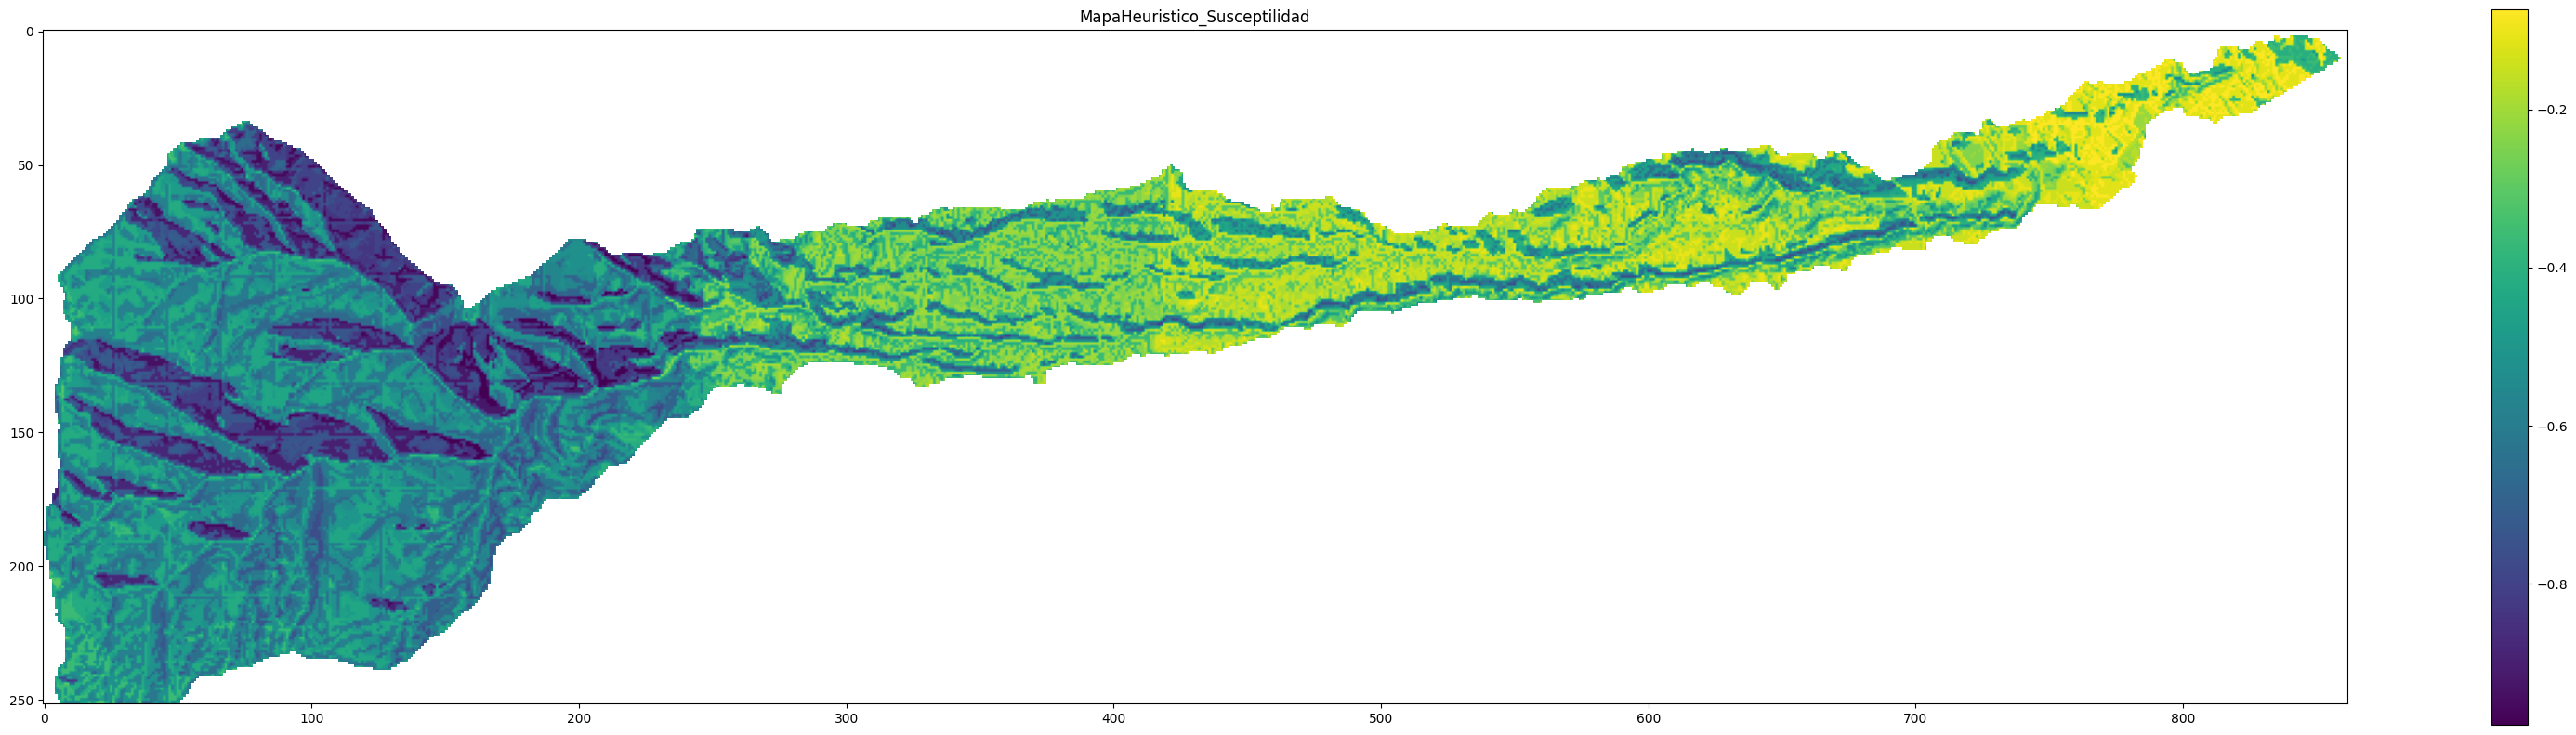

In [37]:
clasesPeso = [geologiaReclass, geomorfologiaReclass, pendienteReclass, curvaturaReclass, aspectoReclass, altitudReclass]
IS = (pesoVariables[0].real * clasesPeso[0]) + (pesoVariables[1].real * clasesPeso[1]) + (pesoVariables[2].real * clasesPeso[2]) + (pesoVariables[3].real * clasesPeso[3]) + (pesoVariables[4].real * clasesPeso[4]) + (pesoVariables[5].real * clasesPeso[5])

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(IS)
plt.colorbar()
plt.savefig('MapaHeuristico_Susceptilidad.png', dpi=500, bbox_inches='tight')
plt.title('MapaHeuristico_Susceptilidad')

In [39]:
#Evaluacion del metodo combinado 
inventarioZonaVc = inventarioZona.ravel()
inventarioVcMenM2 = inventarioZonaVc[~np.isnan(inventarioZonaVc)]

IS_HEU_Vc = IS.ravel()
IS_HEU_VcMenM2 = IS_HEU_Vc[~np.isnan(IS_HEU_Vc)]

print('Longitud inventarioVcMenM2: ', inventariovectorMenM.shape[0])
print('Longitud IS_HEU_VcMenM2: ', IS_HEU_VcMenM2.shape[0], '\n')

#-------------------------------------------

y_real = inventarioVcMenM2
y_IS_HEU = IS_HEU_VcMenM2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ajustar el umbral según sea necesario
umbral = (np.nanmin(IS) + np.nanmax(IS))/2
print('Umbral para clasificar como 1:', umbral, '\n')
y_pred = (IS_HEU_VcMenM2 > umbral).astype(int)

# Calcular métricas de evaluación para cada clase
### NOTA: luego del y_real se puede poner la predicción binario o el IS_HEU_VcMenM2 original

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_real, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred))

Longitud inventarioVcMenM2:  63282
Longitud IS_HEU_VcMenM2:  63282 

Umbral para clasificar como 1: -0.5258009974624498 

              precision    recall  f1-score   support

         0.0       0.98      0.42      0.59     62637
         1.0       0.01      0.30      0.01       645

    accuracy                           0.42     63282
   macro avg       0.49      0.36      0.30     63282
weighted avg       0.97      0.42      0.58     63282



Text(0.7, 0.1, 'AUC=0.3046%')

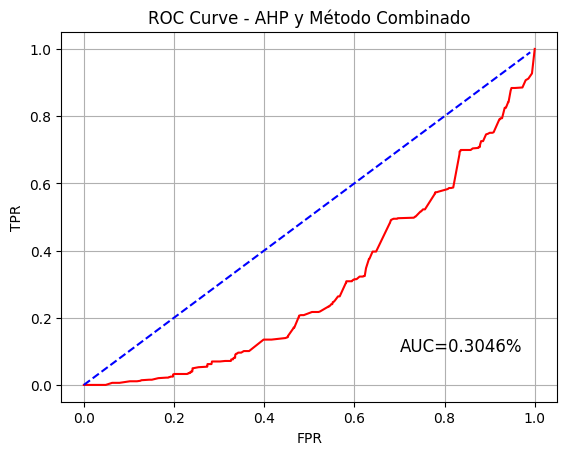

In [42]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_real, y_IS_HEU)
plt.plot(fpr,tpr,color='r')
xb = [i*0.01 for i in range(100)]
yb = [i*0.01 for i in range(100)]

plt.plot(xb, yb, linestyle = '--', color = 'b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - AHP y Método Combinado')
auc = str(round(metrics.auc(fpr,tpr),4))
plt.text(x = 0.7, y = 0.1, s = 'AUC=' + auc + '%', size = 12)

In [41]:
meta = cuencaRaster.profile

raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS.TIF', 'w', 
              driver='Gtiff',height=cuencaB1.shape[0],width=cuencaB1.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);